## Problem Statement
- To predict the acceptance of H-1B visa step 1

## Import the required packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import metrics   #Additional scklearn functions
from sklearn.model_selection import GridSearchCV

## Get the Data

In [2]:
df = pd.read_csv("h1b_2011_2016.csv")

In [3]:
df

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
1,2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843
2,3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
3,4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236
4,5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003
...,...,...,...,...,...,...,...,...,...,...,...
3002453,3002454,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"NYC, NEW YORK",-74.005941,40.712784
3002454,3002455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"SOUTH LAKE, TEXAS",-97.134178,32.941236
3002455,3002456,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"CLINTON, NEW JERSEY",-74.909890,40.636768
3002456,3002457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"OWINGS MILL, MARYLAND",-76.780253,39.419550


## Data Cleansing and Exploratory Data Analysis

In [3]:
# get the columns
df.columns

Index(['Unnamed: 0', 'CASE_STATUS', 'EMPLOYER_NAME', 'SOC_NAME', 'JOB_TITLE',
       'FULL_TIME_POSITION', 'PREVAILING_WAGE', 'YEAR', 'WORKSITE', 'lon',
       'lat'],
      dtype='object')

In [26]:
# check the unique case status
df['YEAR'].unique()

array([2016., 2015., 2014., 2013., 2012., 2011.,   nan])

In [43]:
# get the first five rows
df.head()

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
1,2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843
2,3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
3,4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236
4,5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003


In [21]:
# get the last five rows
df.tail()

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
3002453,3002454,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"NYC, NEW YORK",-74.005941,40.712784
3002454,3002455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"SOUTH LAKE, TEXAS",-97.134178,32.941236
3002455,3002456,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"CLINTON, NEW JERSEY",-74.909890,40.636768
3002456,3002457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"OWINGS MILL, MARYLAND",-76.780253,39.419550
3002457,3002458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"ALTANTA, GEORGIA",-84.387982,33.748995


In [19]:
# delete the unnamed, lon and lat columns 
df = df.drop(['Unnamed: 0'], axis=1)

In [5]:
# get the general information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3002458 entries, 0 to 3002457
Data columns (total 10 columns):
 #   Column              Dtype  
---  ------              -----  
 0   CASE_STATUS         object 
 1   EMPLOYER_NAME       object 
 2   SOC_NAME            object 
 3   JOB_TITLE           object 
 4   FULL_TIME_POSITION  object 
 5   PREVAILING_WAGE     float64
 6   YEAR                float64
 7   WORKSITE            object 
 8   lon                 float64
 9   lat                 float64
dtypes: float64(4), object(6)
memory usage: 229.1+ MB


In [206]:
# get the na values of each column
df.isna().sum()

Unnamed: 0                 0
CASE_STATUS               13
EMPLOYER_NAME             59
SOC_NAME               17734
JOB_TITLE                 43
FULL_TIME_POSITION        15
PREVAILING_WAGE           85
YEAR                      13
WORKSITE                   0
lon                   107242
lat                   107242
dtype: int64

In [20]:
# delete all the rows having na values
df.dropna(axis=0, inplace=True)
df.isna().sum()

CASE_STATUS           0
EMPLOYER_NAME         0
SOC_NAME              0
JOB_TITLE             0
FULL_TIME_POSITION    0
PREVAILING_WAGE       0
YEAR                  0
WORKSITE              0
lon                   0
lat                   0
dtype: int64

In [63]:
# get the count of values according to year
df['YEAR'].value_counts()

2016.0    629299
2015.0    600120
2014.0    498027
2013.0    422427
2012.0    394267
2011.0    333625
Name: YEAR, dtype: int64

In [21]:
# change the data type of year to object
df['YEAR'] = df['YEAR'].astype(int)
#df.info()

In [7]:
# get the statistical information
df.describe()

,PREVAILING_WAGE,YEAR
count,2.984609e+06,2.984609e+06
mean,1.469658e+05,2.013864e+03
std,5.296147e+06,1.678808e+00
min,0.000000e+00,2.011000e+03
25%,5.435000e+04,2.012000e+03
50%,6.500000e+04,2.014000e+03
75%,8.143200e+04,2.015000e+03
max,6.997607e+09,2.016000e+03


In [22]:
# split the worksite column into city and state
# delete the worksite column
df[['CITY', 'STATE']] = df['WORKSITE'].str.split(', ', 1, expand=True)
del df['WORKSITE']

C:\Users\Admin\AppData\Local\Temp\ipykernel_8304\258237839.py:3: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df[['CITY', 'STATE']] = df['WORKSITE'].str.split(', ', 1, expand=True)


In [10]:
# get the unique case status
df['CASE_STATUS'].unique()

array(['CERTIFIED-WITHDRAWN', 'WITHDRAWN', 'CERTIFIED', 'DENIED',
       'REJECTED', 'INVALIDATED',
       'PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED'], dtype=object)

In [23]:
# get the count of each unique case status
df['CASE_STATUS'].value_counts()

CERTIFIED                                             2512114
CERTIFIED-WITHDRAWN                                    195721
DENIED                                                  85161
WITHDRAWN                                               84752
PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED         15
REJECTED                                                    1
INVALIDATED                                                 1
Name: CASE_STATUS, dtype: int64

In [17]:
#from sklearn.preprocessing import LabelEncoder

#status_encoder = LabelEncoder()
#df['CASE_STATUS'] = status_encoder.fit_transform(df['CASE_STATUS'])
#df.head(15)

In [24]:
# convert Certified case status into 1 and Certified-Withdrawn, Denied, Withdrawn, Rejected, Invalidated
# and Pending Quality and Compliance Review - Unassigned to 0
from sklearn.preprocessing import label_binarize

df['ACCEPT_REJECT'] = label_binarize(df['CASE_STATUS'], classes = ['CERTIFIED'])

In [25]:
df.rename(columns={'lon': 'LON', 'lat': 'LAT'}, inplace=True)
df.columns

Index(['CASE_STATUS', 'EMPLOYER_NAME', 'SOC_NAME', 'JOB_TITLE',
       'FULL_TIME_POSITION', 'PREVAILING_WAGE', 'YEAR', 'LON', 'LAT', 'CITY',
       'STATE', 'ACCEPT_REJECT'],
      dtype='object')

In [26]:
# change the position of the accept_reject, city and state columns
df = df[['CASE_STATUS', 'EMPLOYER_NAME', 'SOC_NAME', 'JOB_TITLE', 'FULL_TIME_POSITION', 'PREVAILING_WAGE', 'YEAR', 'STATE', 'CITY', 'LON', 'LAT', 'ACCEPT_REJECT']]
df.head()

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,STATE,CITY,LON,LAT,ACCEPT_REJECT
0,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016,MICHIGAN,ANN ARBOR,-83.743038,42.280826,0
1,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016,TEXAS,PLANO,-96.698886,33.019843,0
2,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016,NEW JERSEY,JERSEY CITY,-74.077642,40.728158,0
3,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016,COLORADO,DENVER,-104.990251,39.739236,0
4,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016,MISSOURI,ST. LOUIS,-90.199404,38.627003,0


In [27]:
# delete the case status column
del df['CASE_STATUS']

In [28]:
# unique employer names
df['EMPLOYER_NAME'].value_counts().count()

214982

In [14]:
# unique soc names
df['SOC_NAME'].value_counts().count()

2131

In [15]:
# unique job titles
df['JOB_TITLE'].value_counts().count()

286610

In [29]:
# remove punctuation marks from the employer_name column 
df['EMPLOYER_NAME'] = df['EMPLOYER_NAME'].str.replace("""[,./'")(*]""", "")
df['EMPLOYER_NAME'] = df['EMPLOYER_NAME'].str.replace("-", " ")

C:\Users\Admin\AppData\Local\Temp\ipykernel_8304\1685616208.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['EMPLOYER_NAME'] = df['EMPLOYER_NAME'].str.replace("""[,./'")(*]""", "")


In [30]:
# remove punctuation marks from the soc_name column 
df['SOC_NAME'] = df['SOC_NAME'].str.replace("""[,./'")(*]""", "")
df['SOC_NAME'] = df['SOC_NAME'].str.replace("-", " ")

C:\Users\Admin\AppData\Local\Temp\ipykernel_8304\3089564863.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['SOC_NAME'] = df['SOC_NAME'].str.replace("""[,./'")(*]""", "")


In [31]:
# remove punctuation marks from the job_title column 
df['JOB_TITLE'] = df['JOB_TITLE'].str.replace("""[,./'")(*]""", "")
df['JOB_TITLE'] = df['JOB_TITLE'].str.replace("-", " ")

C:\Users\Admin\AppData\Local\Temp\ipykernel_8304\3788449375.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['JOB_TITLE'] = df['JOB_TITLE'].str.replace("""[,./'")(*]""", "")


In [32]:
# change the contents of all string columns to upper case

df['EMPLOYER_NAME'] = df['EMPLOYER_NAME'].str.upper()
df['SOC_NAME'] = df['SOC_NAME'].str.upper()
df['JOB_TITLE'] = df['JOB_TITLE'].str.upper()
df['FULL_TIME_POSITION'] = df['FULL_TIME_POSITION'].str.upper()
df['CITY'] = df['CITY'].str.upper()
df['STATE'] = df['STATE'].str.upper()

In [93]:
# unique employer names
df['EMPLOYER_NAME'].value_counts().count()

236013

In [16]:
# unique soc names
df['SOC_NAME'].value_counts().count()

1528

In [76]:
# unique job titles
df['JOB_TITLE'].value_counts().count()

266779

In [32]:
#emp_name = df.sort_values(by='EMPLOYER_NAME')
#emp_name.head(10)

In [34]:
from sklearn.preprocessing import LabelEncoder

status_encoder = LabelEncoder()
df['FULL_TIME_POSITION'] = status_encoder.fit_transform(df['FULL_TIME_POSITION'])
#df.head(15)

In [35]:
# display the first n values of dataset
df.head()

,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,STATE,CITY,LON,LAT,ACCEPT_REJECT
0,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,0,36067.0,2016,MICHIGAN,ANN ARBOR,-83.743038,42.280826,0
1,GOODMAN NETWORKS INC,CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,1,242674.0,2016,TEXAS,PLANO,-96.698886,33.019843,0
2,PORTS AMERICA GROUP INC,CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,1,193066.0,2016,NEW JERSEY,JERSEY CITY,-74.077642,40.728158,0
3,GATES CORPORATION A WHOLLY OWNED SUBSIDIARY OF...,CHIEF EXECUTIVES,REGIONAL PRESIDEN AMERICAS,1,220314.0,2016,COLORADO,DENVER,-104.990251,39.739236,0
4,PEABODY INVESTMENTS CORP,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,1,157518.4,2016,MISSOURI,ST. LOUIS,-90.199404,38.627003,0


In [36]:
df['ACCEPT_REJECT'].value_counts()

1    2512114
0     365651
Name: ACCEPT_REJECT, dtype: int64

In [64]:
df['SOC_NAME'].value_counts().count()

49

In [82]:
df['SOC_NAME'].value_counts()

COMPUTER SYSTEMS ANALYSTS                      499179
SOFTWARE DEVELOPERS APPLICATIONS               408937
COMPUTER PROGRAMMERS                           392036
COMPUTER OCCUPATIONS ALL OTHER                 201862
SOFTWARE DEVELOPERS SYSTEMS SOFTWARE            82644
                                                ...  
COMPUTER SYSTEMS ANALSYSTS                          1
ELEMENTARY SCHOOL TEACHERS EXCEPT SPEC EDUC         1
BIOINFORMATICS SCIENCTISTS                          1
PEDIATRICIAN                                        1
EARTH DRILLERS EXCEPT OIL AND GAS                   1
Name: SOC_NAME, Length: 1474, dtype: int64

In [37]:
soc_values = df['SOC_NAME'].value_counts()

In [25]:
soc_values.describe()

count      1985.000000
mean       1449.755668
std       12800.228946
min           1.000000
25%           2.000000
50%          10.000000
75%         168.000000
max      286598.000000
Name: SOC_NAME, dtype: float64

In [39]:
soc_values[soc_values>500].count()

231

In [40]:
#counts1 = df['SOC_NAME'].value_counts()
df = df[~df['SOC_NAME'].isin(soc_values[soc_values < 501].index)]

In [63]:
df['SOC_NAME'].value_counts().count()

49

In [89]:
df['JOB_TITLE'].value_counts().count()

256103

In [90]:
df['JOB_TITLE'].value_counts()

PROGRAMMER ANALYST                                   244288
SOFTWARE ENGINEER                                    118677
COMPUTER PROGRAMMER                                   68520
SYSTEMS ANALYST                                       60691
SOFTWARE DEVELOPER                                    41748
                                                      ...  
SR NETWEAVER DEVELOPER                                    1
TECHNICAL PRODUCT MANAGER EQS ANALYTICS                   1
PERFORMANCE TEST ENGINNER                                 1
PROJECT ENGINEER PROGRAMMER JR ELECTRICAL ENGINEE         1
SYSWTEMS ADMINISTRATOR                                    1
Name: JOB_TITLE, Length: 256103, dtype: int64

In [42]:
job_values = df['JOB_TITLE'].value_counts()

In [92]:
job_values.describe()

count    256103.000000
mean         11.036286
std         610.706443
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max      244288.000000
Name: JOB_TITLE, dtype: float64

In [43]:
job_values[job_values>1000].count()

293

In [44]:
#counts2 = df['JOB_TITLE'].value_counts()
df = df[~df['JOB_TITLE'].isin(job_values[job_values < 1001].index)]

In [62]:
df['JOB_TITLE'].value_counts().count()

181

In [97]:
df['EMPLOYER_NAME'].value_counts().count()

91502

In [98]:
df['EMPLOYER_NAME'].value_counts()

INFOSYS LIMITED                      118429
TATA CONSULTANCY SERVICES LIMITED     56137
WIPRO LIMITED                         42185
DELOITTE CONSULTING LLP               32109
ACCENTURE LLP                         23669
                                      ...  
KIRKSEY                                   1
CSNAPSORG                                 1
LISCR LLC                                 1
CLEARVISION OPTICAL COMPANY INC           1
TELSEY CAPITAL GROUP LLC                  1
Name: EMPLOYER_NAME, Length: 91502, dtype: int64

In [46]:
emp_values = df['EMPLOYER_NAME'].value_counts()

In [100]:
emp_values.describe()

count     91502.000000
mean         17.972208
std         503.706098
min           1.000000
25%           1.000000
50%           2.000000
75%           4.000000
max      118429.000000
Name: EMPLOYER_NAME, dtype: float64

In [47]:
emp_values[emp_values>600].count()

274

In [48]:
#counts3 = df['EMPLOYER_NAME'].value_counts()
df = df[~df['EMPLOYER_NAME'].isin(emp_values[emp_values < 601].index)]

In [49]:
df['EMPLOYER_NAME'].value_counts().count()

274

In [104]:
df['CITY'].value_counts().count()

1958

In [105]:
df['CITY'].value_counts()

NEW YORK        35204
ATLANTA         20573
HOUSTON         17082
REDMOND         16282
CHARLOTTE       14154
                ...  
CINNAMINSON         1
WEST BABYLON        1
MILLBURN            1
MIDVALE             1
ASPEN               1
Name: CITY, Length: 1958, dtype: int64

In [50]:
city_values = df['CITY'].value_counts()

In [33]:
city_values.describe()

count     4545.000000
mean       169.876788
std       1052.387468
min          1.000000
25%          1.000000
50%          4.000000
75%         23.000000
max      35745.000000
Name: CITY, dtype: float64

In [51]:
city_values[city_values>600].count()

234

In [52]:
#counts4 = df['CITY'].value_counts()
df = df[~df['CITY'].isin(city_values[city_values < 601].index)]

In [53]:
df['CITY'].value_counts().count()

234

In [54]:
soc_values = df['SOC_NAME'].value_counts()
soc_values[soc_values>500].count()

48

In [55]:
for x in soc_values[soc_values<500].index:
    df.loc[df['SOC_NAME']==x, 'SOC_NAME'] = 'OTHERS'

In [56]:
df['SOC_NAME'].value_counts().head(10)

COMPUTER SYSTEMS ANALYSTS               171666
COMPUTER PROGRAMMERS                    120510
SOFTWARE DEVELOPERS APPLICATIONS         83298
COMPUTER OCCUPATIONS ALL OTHER           69318
SOFTWARE DEVELOPERS SYSTEMS SOFTWARE     20945
MANAGEMENT ANALYSTS                      16898
OTHERS                                   13352
COMPUTER SYSTEMS ANALYST                 13239
FINANCIAL ANALYSTS                        9764
ACCOUNTANTS AND AUDITORS                  9695
Name: SOC_NAME, dtype: int64

In [57]:
df['SOC_NAME'].value_counts().count()

49

In [65]:
job_values = df['JOB_TITLE'].value_counts()
job_values[job_values>500].count()

181

In [59]:
for x in job_values[job_values<500].index:
    df.loc[df['JOB_TITLE']==x, 'JOB_TITLE'] = 'OTHERS'

In [60]:
df['JOB_TITLE'].value_counts().head(10)

PROGRAMMER ANALYST         58630
SOFTWARE ENGINEER          41045
COMPUTER PROGRAMMER        28610
TECHNOLOGY LEAD   US       24671
TECHNOLOGY ANALYST   US    22978
SYSTEMS ANALYST            21285
OTHERS                     19806
SENIOR CONSULTANT          15587
CONSULTANT                 15260
BUSINESS ANALYST            9443
Name: JOB_TITLE, dtype: int64

In [61]:
df['JOB_TITLE'].value_counts().count()

181

In [66]:
emp_values = df['EMPLOYER_NAME'].value_counts()
emp_values[emp_values>600].count()

205

In [67]:
for x in emp_values[emp_values<600].index:
    df.loc[df['EMPLOYER_NAME']==x, 'EMPLOYER_NAME'] = 'OTHERS'

In [68]:
df['EMPLOYER_NAME'].value_counts().head(10)

INFOSYS LIMITED                      104034
TATA CONSULTANCY SERVICES LIMITED     44171
WIPRO LIMITED                         32333
OTHERS                                30316
DELOITTE CONSULTING LLP               26303
ACCENTURE LLP                         19098
MICROSOFT CORPORATION                 15977
IBM INDIA PRIVATE LIMITED             13965
ERNST & YOUNG US LLP                  12897
GOOGLE INC                            12622
Name: EMPLOYER_NAME, dtype: int64

In [69]:
df['EMPLOYER_NAME'].value_counts().count()

206

In [70]:
city_values = df['CITY'].value_counts()
city_values[city_values>700].count()

203

In [71]:
for x in city_values[city_values<700].index:
    df.loc[df['CITY']==x, 'CITY'] = 'OTHERS'

In [72]:
df['CITY'].value_counts().head(10)

NEW YORK         35204
ATLANTA          20573
OTHERS           20241
HOUSTON          17082
REDMOND          16282
CHARLOTTE        14154
MOUNTAIN VIEW    14067
SAN JOSE         13963
CHICAGO          13115
PHILADELPHIA     11367
Name: CITY, dtype: int64

In [73]:
df['CITY'].value_counts().count()

204

In [74]:
state_values = df['STATE'].value_counts()
state_values[state_values>10].count()

42

In [56]:
for x in state_values[state_values<10].index:
    df.loc[df['STATE']==x, 'STATE'] = 'OTHERS'

In [76]:
df['STATE'].value_counts().count()

42

In [77]:
df['ACCEPT_REJECT'].value_counts()

1    562712
0     52746
Name: ACCEPT_REJECT, dtype: int64

In [128]:
df.tail(20)

,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,STATE,CITY,LON,LAT,ACCEPT_REJECT
615438,SYNECHRON INC,COMPUTER SYSTEMS ANALYSTS,PROGRAMMER ANALYST,1,73507.0,2011,NORTH CAROLINA,CHARLOTTE,-80.843127,35.227087,1
615439,FACEBOOK INC,SOFTWARE DEVELOPERS APPLICATIONS,SOFTWARE ENGINEER,1,99653.0,2011,CALIFORNIA,PALO ALTO,-122.143019,37.441883,1
615440,HORIZON TECHNOLOGIES INC,COMPUTER SYSTEMS ANALYSTS,COMPUTER SYSTEMS ANALYST,1,61963.0,2011,CALIFORNIA,SUNNYVALE,-122.036350,37.368830,1
615441,HORIZON TECHNOLOGIES INC,COMPUTER SYSTEMS ANALYSTS,COMPUTER SYSTEMS ANALYST,1,61963.0,2011,CALIFORNIA,MILPITAS,-121.899574,37.432334,1
615442,SYNECHRON INC,COMPUTER SYSTEMS ANALYSTS,PROGRAMMER ANALYST,1,83949.0,2011,TENNESSEE,NASHVILLE,-86.781602,36.162664,1
615443,OTHERS,COMPUTER PROGRAMMERS,COMPUTER PROGRAMMER,1,43098.0,2011,CONNECTICUT,WINDSOR,-72.643702,41.852598,0
615444,FUJITSU AMERICA INC,SOFTWARE DEVELOPERS APPLICATIONS,COMPUTER SOFTWARE ENGINEER APPLICATIONS,1,75650.0,2011,PENNSYLVANIA,PITTSBURGH,-79.995886,40.440625,0
615445,IBM CORPORATION,MANAGEMENT ANALYSTS,SENIOR CONSULTANT,1,68349.0,2011,NEVADA,OTHERS,-115.139830,36.169941,0
615446,POPULUS GROUP,MANAGEMENT ANALYSTS,BUSINESS ANALYST,1,63502.4,2011,OHIO,CLEVELAND,-81.694361,41.499320,0
615447,TANISHA SYSTEMS INC,COMPUTER PROGRAMMERS,COMPUTER PROGRAMMER,1,59322.0,2011,MASSACHUSETTS,BOSTON,-71.058880,42.360082,0


In [79]:
#df.to_csv("step1_tab.csv")

In [3]:
df = pd.read_csv("step1_tab.csv")

In [2]:
#df = pd.read_csv("step1_new.csv")

In [4]:
del df['Unnamed: 0']

In [64]:
df

,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,STATE,CITY,LON,LAT,ACCEPT_REJECT
0,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,0,36067.0,2016,MICHIGAN,ANN ARBOR,-83.743038,42.280826,0
1,WAL MART ASSOCIATES INC,OTHERS,OTHERS,1,73882.0,2016,ARKANSAS,BENTONVILLE,-94.208817,36.372854,1
2,CISCO SYSTEMS INC,OTHERS,OTHERS,1,140694.0,2016,CALIFORNIA,SAN JOSE,-121.886329,37.338208,1
3,DELOITTE CONSULTING LLP,OTHERS,MANAGER,1,113318.0,2016,MINNESOTA,MINNEAPOLIS,-93.265011,44.977753,1
4,DELOITTE CONSULTING LLP,OTHERS,MANAGER,1,139256.0,2016,MICHIGAN,OTHERS,-85.668086,42.963360,0
...,...,...,...,...,...,...,...,...,...,...,...
615453,TRISYNC TECHNOLOGIES INC,COMPUTER PROGRAMMERS,COMPUTER PROGRAMMER,1,55245.0,2011,NEW JERSEY,EDISON,-74.412095,40.518715,0
615454,TRISYNC TECHNOLOGIES INC,COMPUTER SYSTEMS ANALYSTS,COMPUTER SYSTEM ANALYST,1,55245.0,2011,NEW JERSEY,EDISON,-74.412095,40.518715,0
615455,TRISYNC TECHNOLOGIES INC,COMPUTER SYSTEMS ANALYSTS,COMPUTER SYSTEM ANALYST,1,55245.0,2011,NEW JERSEY,EDISON,-74.412095,40.518715,0
615456,TRISYNC TECHNOLOGIES INC,COMPUTER SYSTEMS ANALYSTS,COMPUTER SYSTEM ANALYST,1,55245.0,2011,NEW JERSEY,EDISON,-74.412095,40.518715,0


In [161]:
#employer_values = df['EMPLOYER_NAME'].value_counts()
#for x in employer_values[employer_values.isin(range(10,101))].index:
#    df.loc[df['EMPLOYER_NAME']==x, 'EMPLOYER_NAME'] = 'OTHERS'

In [5]:
df['EMPLOYER_NAME'] = df['EMPLOYER_NAME'].astype("category")
df['SOC_NAME'] = df['SOC_NAME'].astype("category")
df['JOB_TITLE'] = df['JOB_TITLE'].astype("category")
df['STATE'] = df['STATE'].astype("category")
df['CITY'] = df['CITY'].astype("category")

In [6]:
employer_dict = dict(enumerate(df['EMPLOYER_NAME'].cat.categories))
soc_dict = dict(enumerate(df['SOC_NAME'].cat.categories))
jobtitle_dict = dict(enumerate(df['JOB_TITLE'].cat.categories))
state_dict = dict(enumerate(df['STATE'].cat.categories))
city_dict = dict(enumerate(df['CITY'].cat.categories))

In [2]:
#employer_dict.items()

In [106]:
list(employer_dict.values()).index('INTUIT INC')

86

In [27]:
soc_dict.get(5)

'CHEMISTS'

In [67]:
list(soc_dict.values()).index('WEB DEVELOPERS')

48

In [28]:
jobtitle_dict.get(122)

'SENIOR SOFTWARE ENGINEER'

In [123]:
list(jobtitle_dict.values()).index('TECHNOLOGY ANALYST   US')

168

In [35]:
state_dict.get(20)

'MICHIGAN'

In [271]:
list(state_dict.values()).index('NEW YORK')

27

In [31]:
city_dict.get(43)

'DALLAS'

In [42]:
list(city_dict.values()).index('MOUNTAIN VIEW')

114

In [24]:
df['PREVAILING_WAGE'].sort_values().tail(30)

481038    167951680.0
79229     170460160.0
455082    171196480.0
501723    172494400.0
606740    173921280.0
413482    173946240.0
480690    174397600.0
531563    175348160.0
413483    176388160.0
402827    176388160.0
501126    176906496.0
365182    178724000.0
493557    180238240.0
510821    180498240.0
590667    180887200.0
309954    182097760.0
500083    184132000.0
502225    185602560.0
532986    187073120.0
151274    189496320.0
505550    189668960.0
591154    189760480.0
508089    199359680.0
520472    200052320.0
292235    205244000.0
520453    207277824.0
502216    207278240.0
462798    210046720.0
308065    242538400.0
399146    709999949.0
Name: PREVAILING_WAGE, dtype: float64

In [7]:
df['EMPLOYER_NAME'] = df['EMPLOYER_NAME'].cat.codes
df['SOC_NAME'] = df['SOC_NAME'].cat.codes
df['JOB_TITLE'] = df['JOB_TITLE'].cat.codes
df['STATE'] = df['STATE'].cat.codes
df['CITY'] = df['CITY'].cat.codes

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615458 entries, 0 to 615457
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   EMPLOYER_NAME       615458 non-null  int16  
 1   SOC_NAME            615458 non-null  int8   
 2   JOB_TITLE           615458 non-null  int16  
 3   FULL_TIME_POSITION  615458 non-null  int64  
 4   PREVAILING_WAGE     615458 non-null  float64
 5   YEAR                615458 non-null  int64  
 6   STATE               615458 non-null  int8   
 7   CITY                615458 non-null  int16  
 8   LON                 615458 non-null  float64
 9   LAT                 615458 non-null  float64
 10  ACCEPT_REJECT       615458 non-null  int64  
dtypes: float64(3), int16(3), int64(3), int8(2)
memory usage: 32.9 MB


In [20]:
# check the covariance
df.cov()

,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,STATE,CITY,LON,LAT,ACCEPT_REJECT
EMPLOYER_NAME,3068.705965,-74.574848,-128.607664,-0.646644,-2.649167e+05,-2.458300,-27.437765,6.391867,-12.516454,-6.484532,-0.565415
SOC_NAME,-74.574848,179.296552,92.227824,0.119642,1.532501e+05,1.492705,1.194256,41.055967,-29.173024,4.740530,-0.250104
JOB_TITLE,-128.607664,92.227824,2765.123988,0.582515,-9.921558e+03,1.849024,-14.688470,147.969459,-167.212484,4.132670,-0.052184
FULL_TIME_POSITION,-0.646644,0.119642,0.582515,0.098882,5.461854e+03,-0.212874,-0.117007,0.593906,-0.478575,0.041252,-0.000054
PREVAILING_WAGE,-264916.663159,153250.105121,-9921.557837,5461.853587,6.549735e+12,-48961.401705,-67530.729036,250070.746440,-158003.795299,-3940.813701,-37908.303179
YEAR,-2.458300,1.492705,1.849024,-0.212874,-4.896140e+04,2.453831,-0.065596,2.151416,-0.089466,-0.101624,0.001447
STATE,-27.437765,1.194256,-14.688470,-0.117007,-6.753073e+04,-0.065596,175.974249,-45.886847,67.356125,14.770815,0.059551
CITY,6.391867,41.055967,147.969459,0.593906,2.500707e+05,2.151416,-45.886847,3318.955402,-215.921826,18.540450,0.088775
LON,-12.516454,-29.173024,-167.212484,-0.478575,-1.580038e+05,-0.089466,67.356125,-215.921826,340.756552,3.688899,0.116359
LAT,-6.484532,4.740530,4.132670,0.041252,-3.940814e+03,-0.101624,14.770815,18.540450,3.688899,20.992372,0.003124


In [14]:
# check the correlation
df.corr()

,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,STATE,CITY,LON,LAT,ACCEPT_REJECT
EMPLOYER_NAME,1.000000,-0.100538,-0.044150,-0.037122,-0.001869,-0.028329,-0.037338,0.002003,-0.012240,-0.025549,-0.036463
SOC_NAME,-0.100538,1.000000,0.130984,0.028415,0.004472,0.071165,0.006723,0.053222,-0.118025,0.077270,-0.066726
JOB_TITLE,-0.044150,0.130984,1.000000,0.035228,-0.000074,0.022447,-0.021057,0.048844,-0.172262,0.017153,-0.003545
FULL_TIME_POSITION,-0.037122,0.028415,0.035228,1.000000,0.006787,-0.432159,-0.028050,0.032784,-0.082446,0.028632,-0.000619
PREVAILING_WAGE,-0.001869,0.004472,-0.000074,0.006787,1.000000,-0.012213,-0.001989,0.001696,-0.003345,-0.000336,-0.052915
YEAR,-0.028329,0.071165,0.022447,-0.432159,-0.012213,1.000000,-0.003157,0.023840,-0.003094,-0.014159,0.003300
STATE,-0.037338,0.006723,-0.021057,-0.028050,-0.001989,-0.003157,1.000000,-0.060043,0.275062,0.243024,0.016037
CITY,0.002003,0.053222,0.048844,0.032784,0.001696,0.023840,-0.060043,1.000000,-0.203036,0.070241,0.005505
LON,-0.012240,-0.118025,-0.172262,-0.082446,-0.003345,-0.003094,0.275062,-0.203036,1.000000,0.043616,0.022518
LAT,-0.025549,0.077270,0.017153,0.028632,-0.000336,-0.014159,0.243024,0.070241,0.043616,1.000000,0.002436


In [8]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [12]:
X = df.iloc[:,:-1]
calc_vif(X)

,variables,VIF
0,EMPLOYER_NAME,4.247346
1,SOC_NAME,3.706064
2,JOB_TITLE,4.404624
3,FULL_TIME_POSITION,9.066561
4,PREVAILING_WAGE,1.002016
5,YEAR,111.637524
6,STATE,3.770521
7,CITY,4.260010
8,LON,31.400267
9,LAT,77.284898


In [9]:
X = df.drop(['YEAR', 'FULL_TIME_POSITION', 'LON', 'LAT', 'ACCEPT_REJECT'],axis=1)
calc_vif(X)

,variables,VIF
0,EMPLOYER_NAME,3.087860
1,SOC_NAME,3.146072
2,JOB_TITLE,3.566566
3,PREVAILING_WAGE,1.001856
4,STATE,2.675820
5,CITY,3.343747


In [9]:
x = df.drop(['LON', 'LAT', 'ACCEPT_REJECT'], axis=1)

y = df['ACCEPT_REJECT']

In [10]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression

select = SelectKBest(score_func=chi2, k=6)
z = select.fit_transform(x,y)

filter = select.get_support()
features = x.columns
 
print("All features:")
print(features)
 
print("Selected best 6:")
print(features[filter])

All features:
Index(['EMPLOYER_NAME', 'SOC_NAME', 'JOB_TITLE', 'FULL_TIME_POSITION',
       'PREVAILING_WAGE', 'YEAR', 'STATE', 'CITY'],
      dtype='object')
Selected best 6:
Index(['EMPLOYER_NAME', 'SOC_NAME', 'JOB_TITLE', 'PREVAILING_WAGE', 'STATE',
       'CITY'],
      dtype='object')


In [81]:
#features = df.iloc[:,[0,1,2,4,6,7]].values
#features

In [64]:
#labels = df.iloc[:,-1].values
#labels

In [40]:
#features = df[['EMPLOYER_NAME', 'SOC_NAME', 'JOB_TITLE', 'PREVAILING_WAGE', 'STATE', 'CITY']].values

In [41]:
#labels = df['ACCEPT_REJECT'].values

In [8]:
x = df.drop(['FULL_TIME_POSITION', 'YEAR', 'LON', 'LAT', 'ACCEPT_REJECT'], axis=1)

y = df['ACCEPT_REJECT']
#y = df.drop(['EMPLOYER_NAME', 'SOC_NAME', 'JOB_TITLE', 'PREVAILING_WAGE', 'STATE', 'CITY', 'FULL_TIME_POSITION', 'YEAR', 'LON', 'LAT'], axis=1)

In [9]:
y

0         0
1         1
2         1
3         1
4         0
         ..
615453    0
615454    0
615455    0
615456    0
615457    0
Name: ACCEPT_REJECT, Length: 615458, dtype: int64

In [13]:
y_train.value_counts()

1    450148
0     42218
Name: ACCEPT_REJECT, dtype: int64

In [37]:
#y['ACCEPT_REJECT'].value_counts()

In [29]:
#y_train_sm

In [84]:
#x = features
#y = labels

In [12]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [55]:
print("Before Over Sampling, count of the label '1': {}".format(sum(y_train == 1)))
print("Before Over Sampling, count of the label '0': {} \n".format(sum(y_train == 0)))

from imblearn.over_sampling import SMOTE

sm = SMOTE()
x_train_sm, y_train_sm = sm.fit_resample(x_train, y_train.ravel())

print('After Over Sampling, the shape of the train_X: {}'.format(x_train_sm.shape))
print('After Over Sampling, the shape of the train_y: {} \n'.format(y_train_sm.shape))
print("After Over Sampling, count of the label '1': {}".format(sum(y_train_sm == 1)))
print("After Over Sampling, count of the label '0': {}".format(sum(y_train_sm == 0)))

Before Over Sampling, count of the label '1': 450148
Before Over Sampling, count of the label '0': 42218 

After Over Sampling, the shape of the train_X: (900296, 6)
After Over Sampling, the shape of the train_y: (900296,) 

After Over Sampling, count of the label '1': 450148
After Over Sampling, count of the label '0': 450148


In [197]:
#from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler()
#x_train_ss = scaler.fit_transform(x_train_sm)
#x_test_ss = scaler.transform(x_test)

In [80]:
#from sklearn.decomposition import PCA

# reduce the 3 independent variables to only two
#pca = PCA(n_components=2)
#x_test_pca = pca.fit_transform(x_test_ss)

In [78]:
#x_test_pca

In [83]:
#def viz_model_dt():
#    from sklearn.tree import DecisionTreeClassifier
    
#    model = DecisionTreeClassifier()
#    model.fit(x_test_pca, y_test)
#    return model

In [ ]:
#def viz_model_rf():
#    from sklearn.ensemble import RandomForestClassifier
    
#    model = RandomForestClassifier(n_estimators=10)
#    model.fit(x_test_pca, y_test)
#    return model

In [ ]:
#def viz_model_xgb():
#    import xgboost as xgb
    
#    model = xgb.XGBClassifier()
#    model.fit(x_test_pca, y_test)
#    return model

In [84]:
#viz_dt = viz_model_dt()

In [ ]:
#viz_rf = viz_model_rf()

In [ ]:
#viz_xgb = viz_model_xgb()

In [1]:
#plt.scatter(x_test_pca[:,0][y_test == 0], x_test_pca[:,1][y_test == 0], color="red", label="Not Approved")
#plt.scatter(x_test_pca[:,0][y_test == 1], x_test_pca[:,1][y_test == 1], color="green", label="Approved")

#plt.title("Classification Result Visualization")
#plt.legend()

In [2]:
#y_pred = viz_dt.predict(x_test_pca)

#plt.scatter(x_test_pca[:,0][y_pred == 0], x_test_pca[:,1][y_pred == 0], color="red", label="Not Approved")
#plt.scatter(x_test_pca[:,0][y_pred == 1], x_test_pca[:,1][y_pred == 1], color="green", label="Approved")

#plt.title("Classification Result Visualization Pred")
#plt.legend()

In [30]:
#def create_model_lg():
#    from sklearn.linear_model import LogisticRegressionCV
    
#    model = LogisticRegressionCV(max_iter=1000)
#    model.fit(x_train_sm, y_train_sm)
#    return model

In [31]:
#def create_model_nb():
#    from sklearn.naive_bayes import GaussianNB
    
#    model = GaussianNB()
#    model.fit(x_train_sm, y_train_sm)
#    return model

In [15]:
def create_model_knn():
    from sklearn.neighbors import KNeighborsClassifier
    
    model = KNeighborsClassifier(n_neighbors=5)
    model.fit(x_train_sm, y_train_sm)
    return model

In [16]:
def create_model_dt():
    from sklearn.tree import DecisionTreeClassifier
    
    model = DecisionTreeClassifier()
    model.fit(x_train_sm, y_train-sm)
    return model

In [17]:
def create_model_rf():
    from sklearn.ensemble import RandomForestClassifier
    
    model = RandomForestClassifier()
    model.fit(x_train_sm, y_train_sm)
    return model

In [18]:
def create_model_xgb():
    import xgboost as xgb
    
    model = xgb.XGBClassifier()
    model.fit(x_train_sm, y_train_sm)
    return model

In [12]:
def modelfit(alg, useTrainCV=True, cv_folds=5):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(x_train_sm.values, label=y_train_sm)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
                          metrics='auc', verbose_eval=False)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(x_train_sm, y_train_sm)
        
    #Predict training set:
    dtrain_predictions = alg.predict(x_test)
    dtrain_predprob = alg.predict_proba(x_test)[:,1]
        
    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % metrics.accuracy_score(y_test, dtrain_predictions))
    print("AUC Score (Train): %f" % metrics.roc_auc_score(y_test, dtrain_predprob))
                    
    feat_imp = pd.Series(alg.get_booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')
    
    print("Best Iteration: {}".format(alg.get_booster().best_iteration))
    print("Best N Tree Limit: {}".format(alg.get_booster().best_ntree_limit))


Model Report
Accuracy : 0.8359
AUC Score (Train): 0.819236
Best Iteration: 999
Best N Tree Limit: 1000


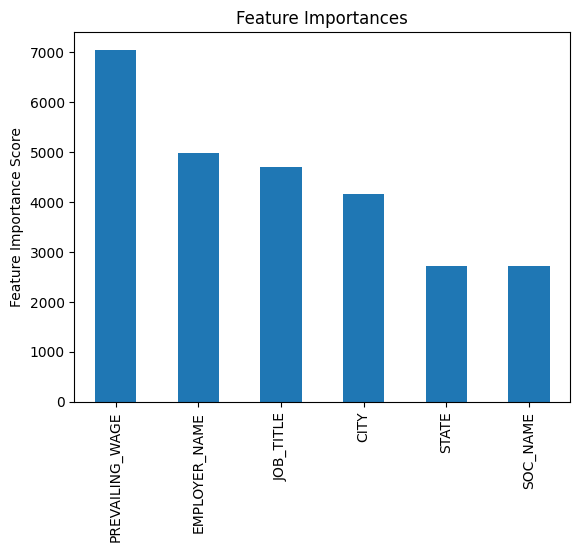

In [13]:
#no_columns = 'FULL_TIME_POSITION', 'YEAR', 'LON', 'LAT'
#target = 'ACCEPT_REJECT'

#Choose all predictors except target & no_columns
#predictors = [x for x in x_train_sm.columns if x not in [target, no_columns]]
xgb1 = xgb.XGBClassifier(
    learning_rate =0.3,
    n_estimators=1000,
    max_depth=5,
    min_child_weight=1,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8, 
    objective= 'binary:logistic',
    nthread=4,
    scale_pos_weight=1,
    seed=27,
    eval_metric='auc'
)

modelfit(xgb1)

In [33]:
#model_lg = create_model_lg()

In [32]:
#model_nb = create_model_nb()

In [19]:
model_knn = create_model_knn()

In [20]:
model_dt = create_model_dt()

In [21]:
model_rf = create_model_rf()

In [22]:
model_xgb = create_model_xgb()

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, classification_report

def evaluate_model(model, model_name):
    print(f"--- evaluation report of {model_name} ---")
    
    y_pred = model.predict(x_test)
    
    # get confusion matrix
    print("Confusion Matrix")
    print(confusion_matrix(y_test, y_pred))
    
    accuracy = accuracy_score(y_test, y_pred)
    print(f"accuaracy = {accuracy * 100:0.2f}%")
    
    precision = precision_score(y_test, y_pred)
    print(f"precision = {precision}") 
    
    recall = recall_score(y_test, y_pred)
    print(f"recall = {recall}")
    
    f1 = f1_score(y_test, y_pred)
    print(f"f1 acore = {f1}")
    
    # get the classification report
    print(classification_report(y_test, y_pred))

In [24]:
from sklearn.metrics import roc_curve, roc_auc_score

def roc_evaluation(model, model_name):
    print(f"--- roc evaluation report of {model_name} ---")
    
    # get the probabilities
    y_pred_probabilities = model.predict_proba(x_test)[:, 1]
    
    # get fpr, tpr
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_probabilities)
    
    # draw the curv
    plt.plot(fpr, tpr, label="RoC Curve")
    plt.legend()
    
    # get the roc score
    roc_score = roc_auc_score(y_test, y_pred_probabilities)
    print(f"roc score = {roc_score}")

In [48]:
#evaluate_model(model_lg, "Logistic Regression")
#roc_evaluation(model_lg, "Logistic Regression")

In [49]:
#evaluate_model(model_nb, "Naive Bayes")
#roc_evaluation(model_nb, "Naive Bayes")

--- evaluation report of K Nearest Neighbour ---
Confusion Matrix
[[  1397   9131]
 [  2342 110222]]
accuaracy = 90.68%
precision = 0.9234958484495572
recall = 0.9791940584911695
f1 acore = 0.95052971537231
              precision    recall  f1-score   support

           0       0.37      0.13      0.20     10528
           1       0.92      0.98      0.95    112564

    accuracy                           0.91    123092
   macro avg       0.65      0.56      0.57    123092
weighted avg       0.88      0.91      0.89    123092

--- roc evaluation report of K Nearest Neighbour ---
roc score = 0.7048432794976534


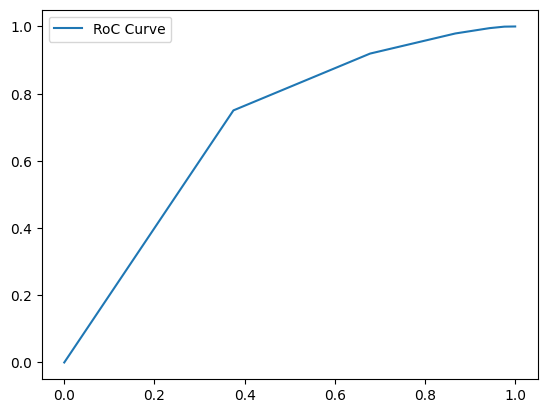

In [25]:
evaluate_model(model_knn, "K Nearest Neighbour")
roc_evaluation(model_knn, "K Nearest Neighbour")

--- evaluation report of Decision Tree ---
Confusion Matrix
[[  2102   8426]
 [  5833 106731]]
accuaracy = 88.42%
precision = 0.9268303272923053
recall = 0.948180590597349
f1 acore = 0.9373839039877746
              precision    recall  f1-score   support

           0       0.26      0.20      0.23     10528
           1       0.93      0.95      0.94    112564

    accuracy                           0.88    123092
   macro avg       0.60      0.57      0.58    123092
weighted avg       0.87      0.88      0.88    123092

--- roc evaluation report of Decision Tree ---
roc score = 0.7046457559328086


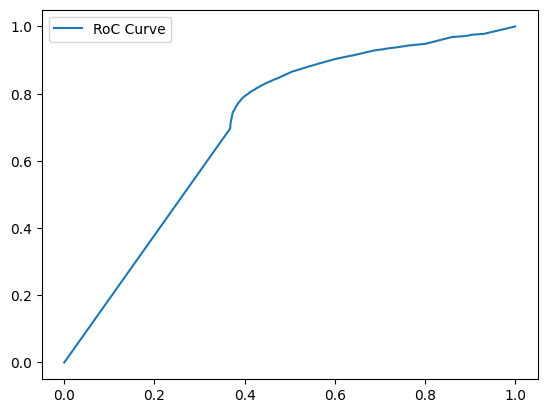

In [26]:
evaluate_model(model_dt, "Decision Tree")
roc_evaluation(model_dt, "Decision Tree")

--- evaluation report of Random Forest ---
Confusion Matrix
[[  1530   8998]
 [  3214 109350]]
accuaracy = 90.08%
precision = 0.9239699868185351
recall = 0.9714473543939448
f1 acore = 0.9471140521064302
              precision    recall  f1-score   support

           0       0.32      0.15      0.20     10528
           1       0.92      0.97      0.95    112564

    accuracy                           0.90    123092
   macro avg       0.62      0.56      0.57    123092
weighted avg       0.87      0.90      0.88    123092

--- roc evaluation report of Random Forest ---
roc score = 0.7857021349941389


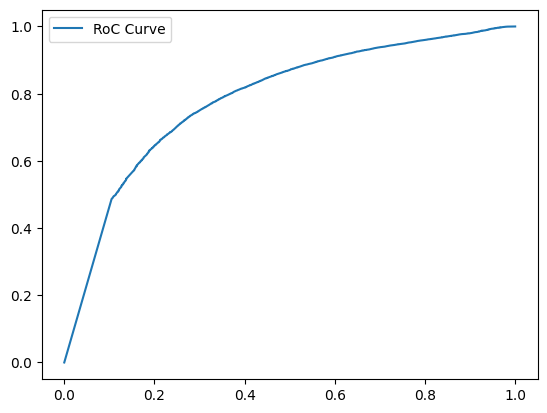

In [27]:
evaluate_model(model_rf, "Random Forest")
roc_evaluation(model_rf, "Random Forest")

--- evaluation report of XGBoost ---
Confusion Matrix
[[   555   9973]
 [   374 112190]]
accuaracy = 91.59%
precision = 0.9183631705180783
recall = 0.9966774457197684
f1 acore = 0.955919003778858
              precision    recall  f1-score   support

           0       0.60      0.05      0.10     10528
           1       0.92      1.00      0.96    112564

    accuracy                           0.92    123092
   macro avg       0.76      0.52      0.53    123092
weighted avg       0.89      0.92      0.88    123092

--- roc evaluation report of XGBoost ---
roc score = 0.8345281383962966


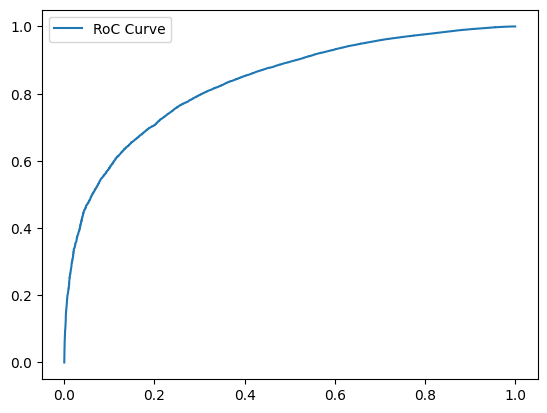

In [28]:
evaluate_model(model_xgb, "XGBoost")
roc_evaluation(model_xgb, "XGBoost")

In [7]:
#import tensorflow as tf
#from keras.models import Sequential
#from keras.layers import Dense

#model = Sequential()
#model.add(Dense(6, activation='relu', input_shape=(6,)))
#model.add(Dense(6, activation='relu'))
#model.add(Dense(1, activation='sigmoid'))
#model.compile(loss='binary_crossentropy',
#optimizer='adam',
#metrics=['accuracy'])
#model.fit(x_train_ss, y_train_sm, epochs=50, batch_size=10, verbose=1)

In [80]:
#EMPLOYER_NAME, SOC_NAME, JOB_TITLE, PREVAILING_WAGE, STATE, CITY
#predictions_dt = model_dt.predict([[81, 24, 76, 100000, 10, 66]])
#probabilities_dt = model_dt.predict_proba([[81, 24, 76, 100000, 10, 66]])
#predictions

#print("---- Decision Tree ---- ")
#print(predictions_dt)
#print(probabilities_dt)
#if predictions_dt[0] >= 0.5:
#    print(f"The visa is approved with {probabilities_dt}")
#else:
#    print("The visa is not approved")  
#65, 23, 32, 90000, 16, 45
#3, 47, 22, 70000, 3, 34

In [50]:
#EMPLOYER_NAME, SOC_NAME, JOB_TITLE, PREVAILING_WAGE, STATE, CITY
predictions_rf = model_rf.predict([[65, 48, 122, 120000, 20, 43]])
probabilities_rf = model_rf.predict_proba([[65, 48, 122, 120000, 20, 43]])
#predictions

print("---- Random Forest ---- ")
print(predictions_rf)
print(probabilities_rf)
if predictions_rf[0] >= 0.5:
    print(f"The visa is approved with {round(probabilities_rf[0][1] * 100, 2)}% probability")
else:
    print(f"The visa is not approved with {round(probabilities_rf[0][0] * 100, 2)}% probabiltiy")  

---- Random Forest ---- 
[1]
[[0.39416667 0.60583333]]
The visa is approved with 60.58% probability


C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [48]:
#EMPLOYER_NAME, SOC_NAME, JOB_TITLE, PREVAILING_WAGE, STATE, CITY
predictions_xgb = model_xgb.predict(np.array([[65, 48, 122, 200000, 20, 43]]))
probabilities_xgb = model_xgb.predict_proba(np.array([[65, 48, 122, 200000, 20, 43]]))

print("---- XGBoost ---- ")
print(predictions_xgb)
print(probabilities_xgb)

if predictions_xgb[0] >= 0.5:
    print(f"The visa is approved with {round(probabilities_xgb[0][1] * 100, 2)}% probability")
else:
    print(f"The visa is not approved with {round(probabilities_xgb[0][0] * 100, 2)}% probability")
    
# 34, 5, 122, 60000, 43, 43
# 65, 23, 32, 90000, 16, 45

---- XGBoost ---- 
[1]
[[0.3803931 0.6196069]]
The visa is approved with 61.96% probability


In [97]:
import pickle

# create an empty binary file 
model_file = open('h1b_prediction_model_rf2.pk', 'wb')

# dump the model into the file
pickle.dump(model_rf, model_file)

# close the file
model_file.close()